In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel("D:\\Machine Learning Analyst Norquest MLAD\\Personal Projects Dataset\\yahoo_data.xlsx")

In [6]:
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [7]:
#Check the datatypes of the features to see if any data type needs to be changed
data.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume           int64
dtype: object

In [8]:
#Changing 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

In [9]:
#Sorting the values by date
data = data.sort_values(by = 'Date')
data = data.reset_index(drop=True)
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


In [10]:
data.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
1254,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
1255,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
1256,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
1257,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000


## Duplicate Value Analysis

In [11]:
#Finding duplicate values
duplicates = data[data.duplicated()]
print("Duplicates: ")
print(duplicates)

Duplicates: 
Empty DataFrame
Columns: [Date, Open, High, Low, Close*, Adj Close**, Volume]
Index: []


As we can observe there are no duplicate values

## Null Value Analysis

In [12]:
data.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

Our dataset is perfect and does not have any null values

## Outlier Analysis

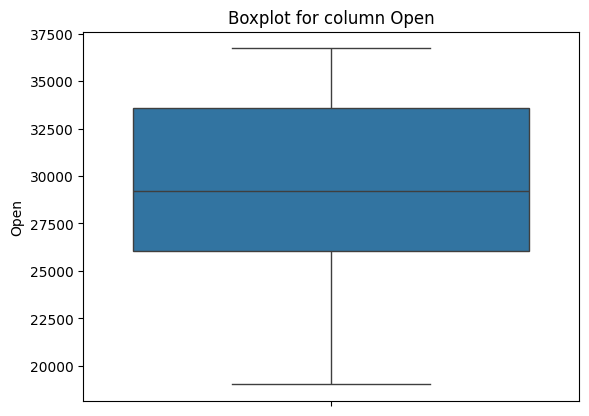

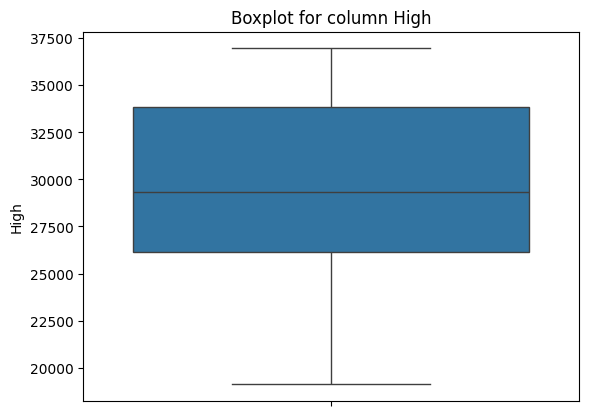

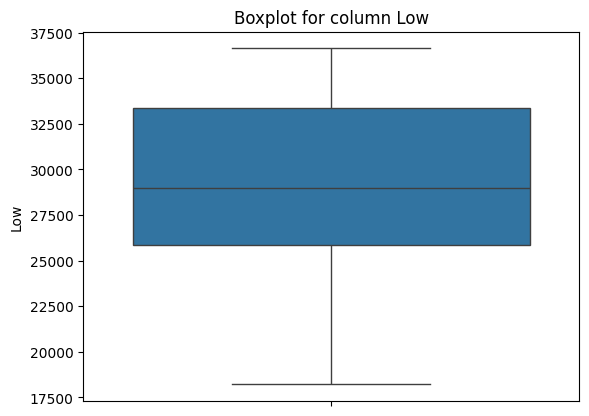

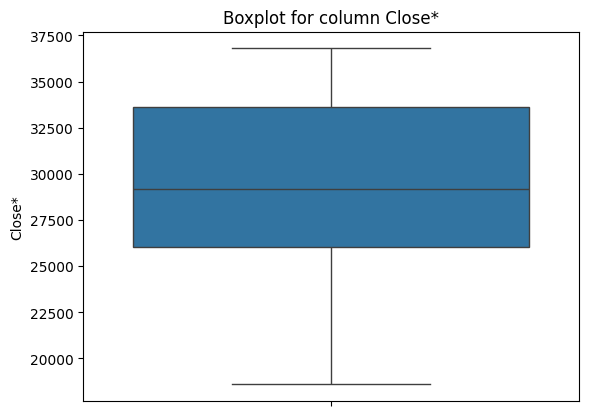

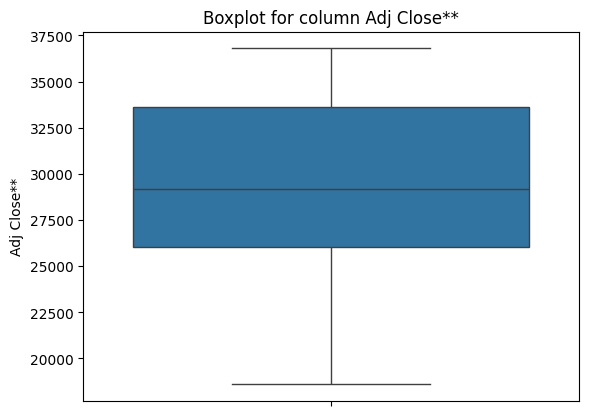

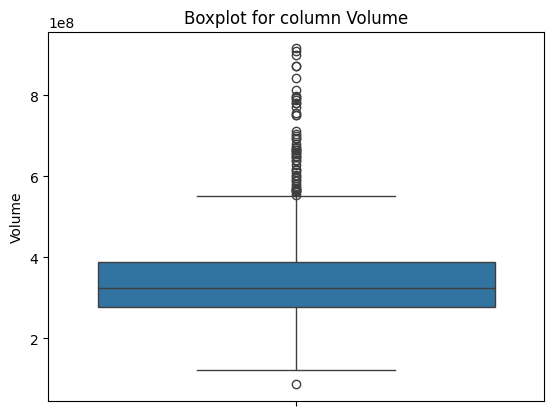

In [13]:
# We need to visualize each column to identify any potential outliers
numerical_columns = data.select_dtypes(include = 'number')

for column in numerical_columns:
    plt.figure()
    sns.boxplot(y= data[column])
    plt.title(f"Boxplot for column {column}")
    plt.show()

From the following visualizations, we notice that only the 'volume' feature has outliers indicating important market sentiments. We still need to handle the outliers inorder to reduce the impact of these outliers

# Feature Engineering

In [14]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [15]:
#Importing Technical-Analysis Library
# import pandas_ta as ta

def feature_engineering(df):

    # Creting new log transformed column to handle outliers
    df['log_volume'] = np.log(df['Volume'] + 1)
    
    #Calculating Daily Return
    df['Daily_Returns'] = df['Adj Close**'].pct_change()
    df['Daily_Returns'] = df['Daily_Returns'].fillna(0)

    #Calculating Moving averages
    df['MA_7'] = df['Adj Close**'].rolling(window = 7).mean()
    df['MA_7'] = df['MA_7'].fillna(0)
    df['MA_30'] = df['Adj Close**'].rolling(window = 30).mean()
    df['MA_30'] = df['MA_30'].fillna(0)

    #Calculating Volatility
    df['volatility'] = df['Daily_Returns'].rolling(window = 7).std()
    df['volatility'] = df['volatility'].fillna(0)

    #Preparing a lag column with a lag of 1 day
    df['Lag_1'] = df['Adj Close**'].shift(1)
    df['Lag_1'] = df['Lag_1'].fillna(0)

    # #Prepare a 14-days RSI column
    # df['RSI'] = data.ta.rsi(close='Close', length=14, append=True)

    # #Calculate the MACD (Moving Average Convergence Divergence)
    # df['MACD'], df['MACD_signal'], df['MACD_hist'] = data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

    #Return the constructed data_frame
    return df

df = feature_engineering(data)
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,log_volume,Daily_Returns,MA_7,MA_30,volatility,Lag_1
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,19.755866,0.000000,0.0,0.0,0.0,0.00
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,19.769663,-0.007223,0.0,0.0,0.0,24099.05
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,19.779707,0.000216,0.0,0.0,0.0,23924.98
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,19.613026,0.013889,0.0,0.0,0.0,23930.15
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,19.544538,0.003908,0.0,0.0,0.0,24262.51


# Exploratory Data Analysis

## Stock Price Over Time

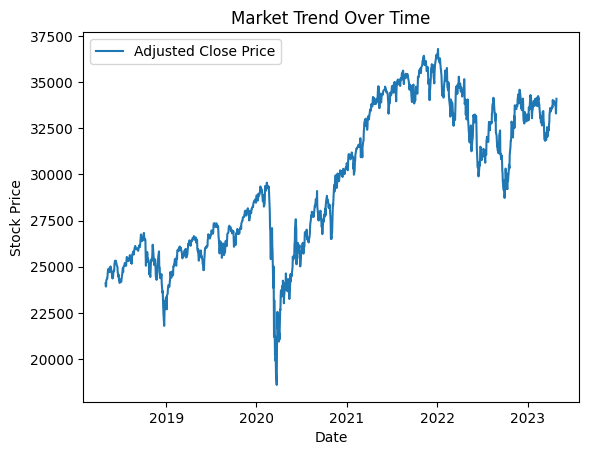

In [16]:
#Line Plot for stock price
plt.figure()
plt.plot(df['Date'], df['Adj Close**'], label = 'Adjusted Close Price')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Market Trend Over Time")
plt.legend()
plt.show()

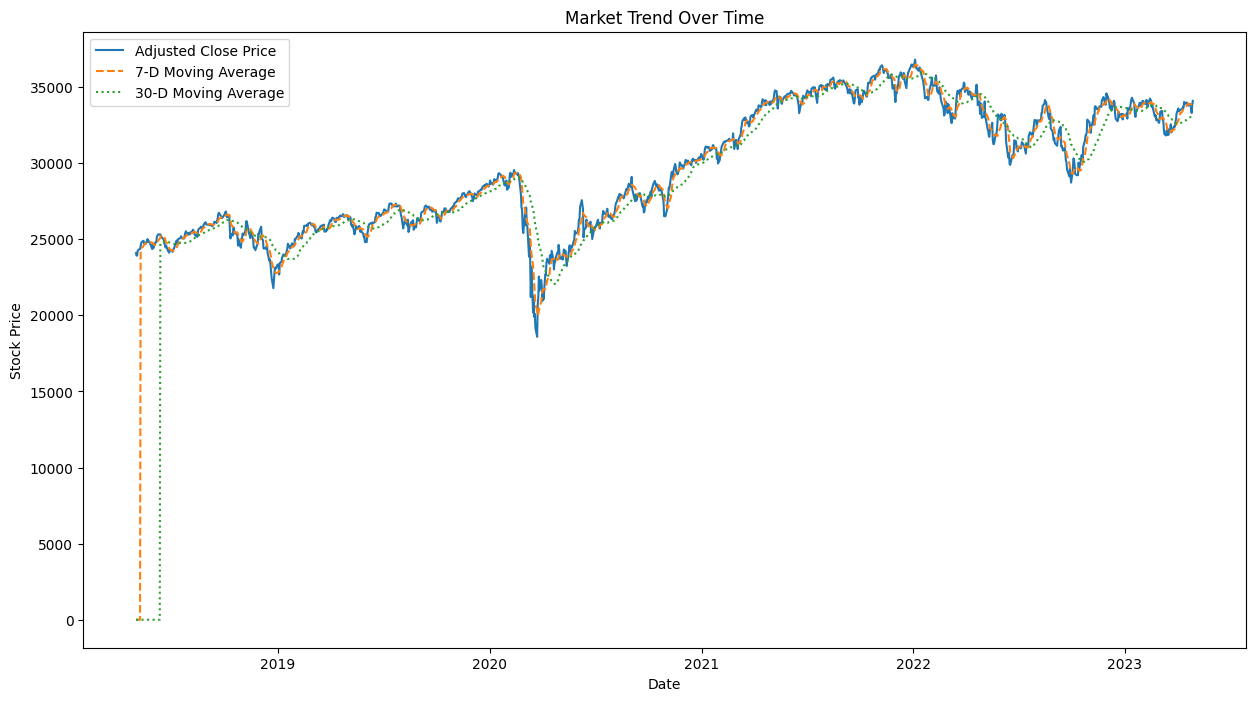

In [17]:
#Stock Price with moving averages
plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['Adj Close**'], label = 'Adjusted Close Price')
plt.plot(df['Date'], df['MA_7'], label = "7-D Moving Average", linestyle = 'dashed')
plt.plot(df['Date'], df['MA_30'], label = "30-D Moving Average", linestyle = 'dotted')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Market Trend Over Time")
plt.legend()
plt.show()

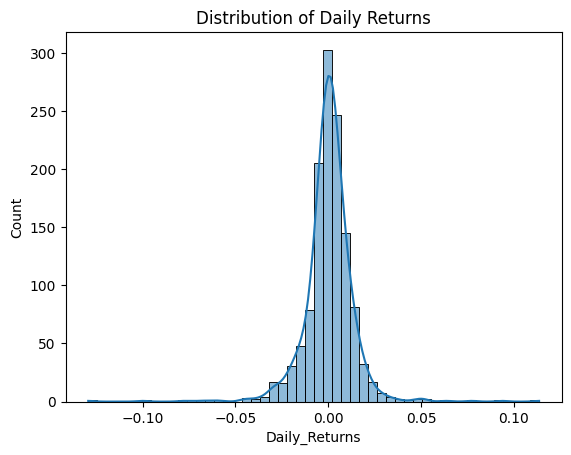

In [18]:
#Returns distribution
sns.histplot(df['Daily_Returns'], bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

# Feature Selection

Feature selection aims to identify the most important features which influence the price of the stock & thus which features to consider to predict the future price of a stock

### Correlation Matrix

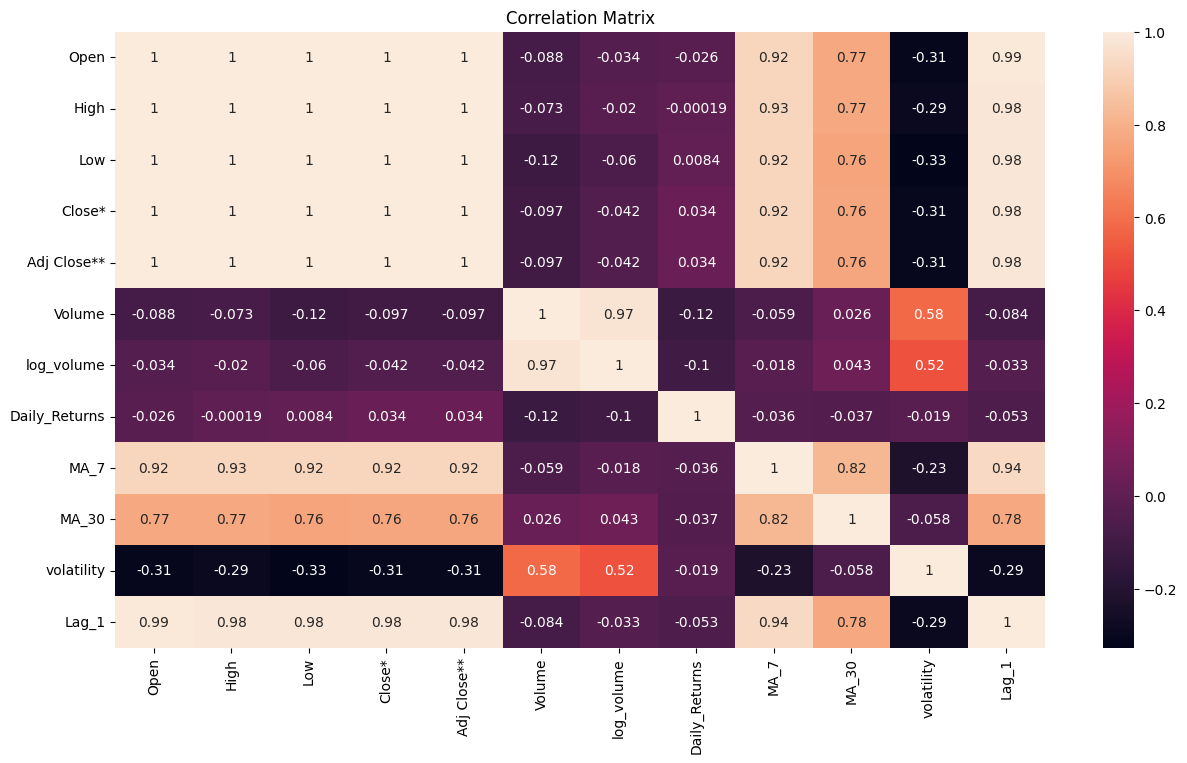

In [19]:
numerical_features = df.select_dtypes(include = 'number')
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

### Recursive Feature Elimination

We will identify the most important features by recursively eliminating the least important features

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Preparing the data
X = df.drop(['Date', 'Adj Close**', 'Close*'], axis=1)
y = df['Adj Close**']

#Inititalizing LinearRegression Model
model = LinearRegression()

#Fit the RFE to find top 5 important features
selector = RFE(model, n_features_to_select=5)
X_selected = selector.fit_transform(X,y)

#Displaying selected features
selected_features = X.columns[selector.support_]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['High', 'Low', 'log_volume', 'Daily_Returns', 'volatility'], dtype='object')


Visualizing importance of, 'High', 'Low', 'log_volume', 'Daily_Returns', 'volatility' are the most important features

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9832\2570158109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Feature', data=feature_ranks, palette='coolwarm', dodge=False)


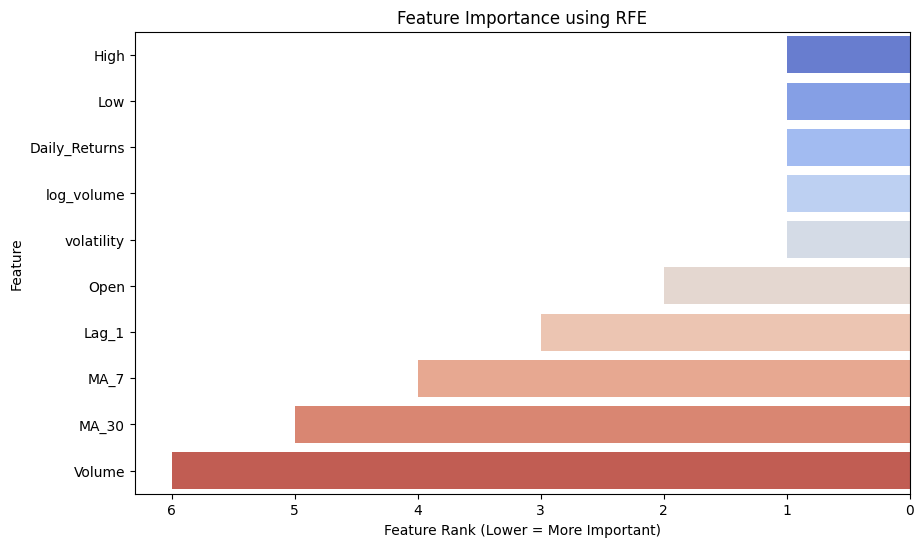

In [21]:
feature_ranks = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})

# Sort by rank (lower ranks are more important)
feature_ranks = feature_ranks.sort_values(by='Rank')

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Feature', data=feature_ranks, palette='coolwarm', dodge=False)
plt.xlabel('Feature Rank (Lower = More Important)')
plt.ylabel('Feature')
plt.title('Feature Importance using RFE')
plt.gca().invert_xaxis()  # Invert axis so most important is on top
plt.show()

# Data Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 )

# Best Fit Line


### Linear Regression

In [23]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Initialize model
lr_model = LinearRegression()
trained = lr_model.fit(X_train, y_train)

#Predicting the close price
y_pred = trained.predict(X_test)

#Weight and Bias for Best Fit Line
w = trained.coef_
b = trained.intercept_
print(f"Best Fit Line: y = {w[0]}x + ({b})")

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression MSE:", mse)
print("Linear Regression R^2:", r2)

Best Fit Line: y = 0.4910663105310431x + (-87.73634767140175)
Linear Regression MSE: 11597.728447118207
Linear Regression R^2: 0.9992213831462492


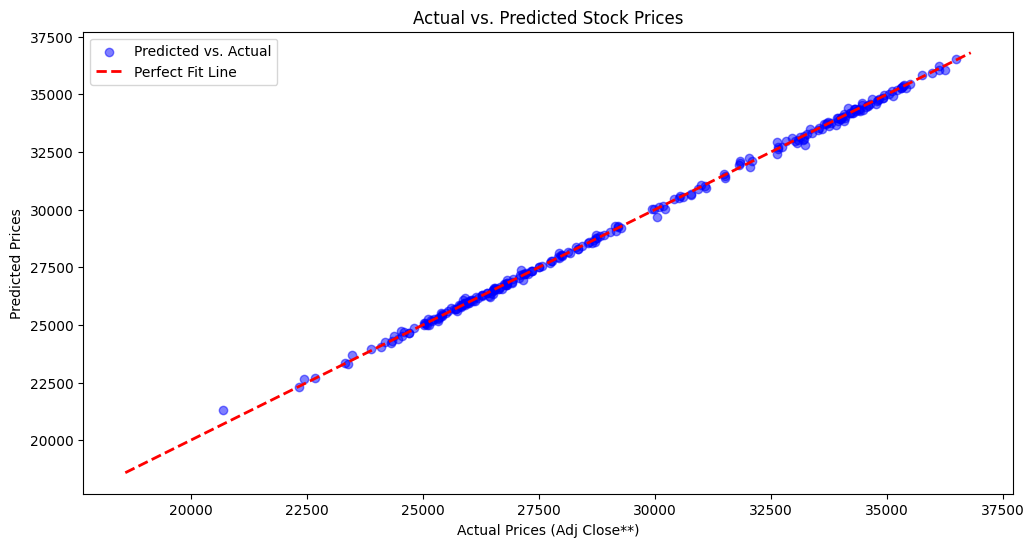

In [41]:
#Visualizing predicted values from LinearRegression
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs. Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Prices (Adj Close**)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

### Random Forest Regressor

In [25]:
#Randon Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R^2:", r2_rf)

Random Forest MSE: 24029.644933797368
Random Forest R^2: 0.9983867628371871


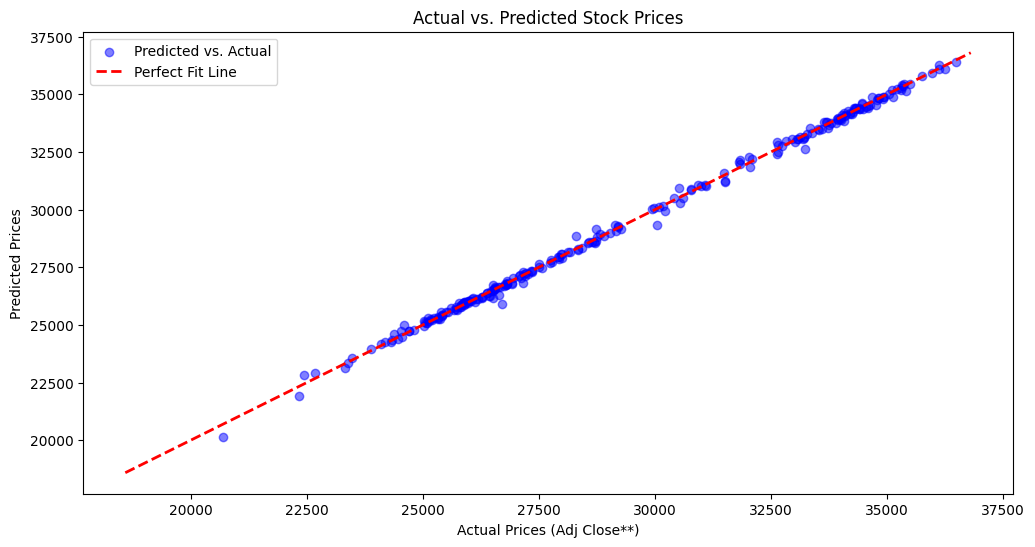

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label="Predicted vs. Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Prices (Adj Close**)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

# Time Series Forecasting using FB-Prophet Model

In [27]:
from prophet import Prophet
from datetime import timedelta

d:\Machine Learning Analyst Norquest MLAD\test folder\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,log_volume,Daily_Returns,MA_7,MA_30,volatility,Lag_1
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,19.755866,0.000000,0.0,0.0,0.0,0.00
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,19.769663,-0.007223,0.0,0.0,0.0,24099.05
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,19.779707,0.000216,0.0,0.0,0.0,23924.98
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,19.613026,0.013889,0.0,0.0,0.0,23930.15
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,19.544538,0.003908,0.0,0.0,0.0,24262.51


In [29]:
df = data.loc[:, ['Date', 'Close*']]
df.head()

,Date,Close*
0,2018-05-01,24099.05
1,2018-05-02,23924.98
2,2018-05-03,23930.15
3,2018-05-04,24262.51
4,2018-05-07,24357.32


In [30]:
df['Date'].dtype

dtype('<M8[ns]')

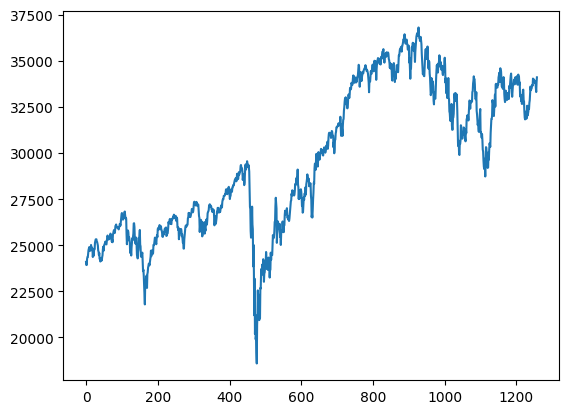

In [31]:
plt.plot( df['Close*'])

In [32]:
df.columns = df.columns.get_level_values(0)
# df['Date'] = df.index
df = df.rename(columns={"Date": "ds", "Close*": "y"}, errors="raise")
df.head()

,ds,y
0,2018-05-01,24099.05
1,2018-05-02,23924.98
2,2018-05-03,23930.15
3,2018-05-04,24262.51
4,2018-05-07,24357.32


In [33]:
model = Prophet()
model.fit(df)
model

23:15:50 - cmdstanpy - INFO - Chain [1] start processing
23:15:51 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1404,2023-09-22,31925.758205,29749.837568,34094.719118
1405,2023-09-23,31328.941329,29219.732857,33470.905888
1406,2023-09-24,31301.976493,29224.309329,33417.781150
1407,2023-09-25,31837.220321,29873.071287,34004.574750
1408,2023-09-26,31828.753920,29672.944352,33882.065551


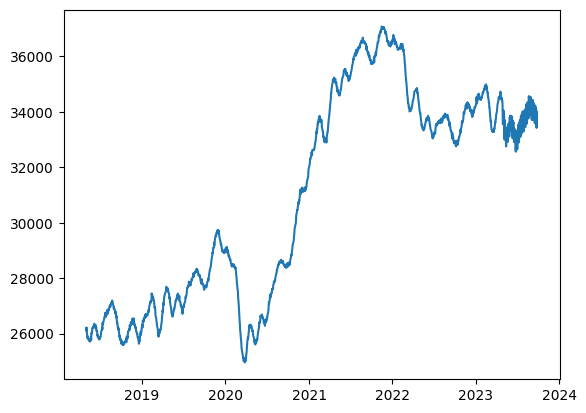

In [38]:
plt.plot(forecast['ds'],forecast['yhat_upper'])

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array(['2018-05-01T00:00:00.000000000', '2018-05-02T00:00:00.000000000',
                          '2018-05-03T00:00:00.000000000', ..., '2023-04-26T00:00:00.000000000',
                          '2023-04-27T00:00:00.000000000', '2023-04-28T00:00:00.000000000'],
                         shape=(1258,), dtype='datetime64[ns]'),
              'y': {'bdata': ('MzMzM8OI10CF61G4Pl3XQJqZmZmJXt' ... 'rXu0LgQOxRuB5FhOBA7FG4HkWm4EA='),
                    'dtype': 'f8'}},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2018-05-01T00:00:00.000000000', '2018-05-02T00:00:00.000000000',
                          '2018-05-03T00:00:00.000000000', ..., '2023-09-24T00:00:00.000000000',
                          '2023-09-25T00:00:00.000000000', '2023-09-26T00:00:00.000000000'],
                         shape=(1409,), dtype='datetime64[ns]'),
              'y': {'bdata': ('+23R76xW10AEYfVmOzvXQGURqhFkRN' ... 'wTitxAuBj3j0Qs3UAH50FwPPrcQA=='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array(['2018-05-01T00:00:00.000000000', '2018-05-02T00:00:00.000000000',
                          '2018-05-03T00:00:00.000000000', ..., '2023-09-24T00:00:00.000000000',
                          '2023-09-25T00:00:00.000000000', '2023-09-26T00:00:00.000000000'],
                         shape=(1409,), dtype='datetime64[ns]'),
              'y': {'bdata': ('+YksUwGA2EC5QQ5/C27YQMvMq3gOXd' ... '5+kd5AfCO/GU4X30D6ODhAMBXfQA=='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2018-05-01T00:00:00.000000000', '2018-05-02T00:00:00.000000000',
                          '2018-05-03T00:00:00.000000000', ..., '2023-09-24T00:00:00.000000000',
                          '2023-09-25T00:00:00.000000000', '2023-09-26T00:00:00.000000000'],
                         shape=(1409,), dtype='datetime64[ns]'),
              'y': {'bdata': ('nYtk/zWS2UBp17Ne43zZQIwWtEHTmt' ... '84UeBAfelaZJKa4EBHCf4YQovgQA=='),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds'},
                         'type': 'date'},
               'yaxis': {'title': {'text': 'y'}}}
})